Data source -> https://www.kaggle.com/datasets/justinas/nba-players-data/data

In [3]:
# access my data
import pandas as pd

file_path = '/Users/chrisgoyette/Python_DA_Class/data/all_seasons.csv'

df = pd.read_csv(file_path)
df


,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,12839,Joel Embiid,PHI,29.0,213.36,127.005760,Kansas,Cameroon,2014,1,...,33.1,10.2,4.2,8.8,0.057,0.243,0.370,0.655,0.233,2022-23
12840,12840,John Butler Jr.,POR,20.0,213.36,86.182480,Florida State,USA,Undrafted,Undrafted,...,2.4,0.9,0.6,-16.1,0.012,0.065,0.102,0.411,0.066,2022-23
12841,12841,John Collins,ATL,25.0,205.74,102.511792,Wake Forest,USA,2017,1,...,13.1,6.5,1.2,-0.2,0.035,0.180,0.168,0.593,0.052,2022-23
12842,12842,Jericho Sims,NYK,24.0,208.28,113.398000,Texas,USA,2021,2,...,3.4,4.7,0.5,-6.7,0.117,0.175,0.074,0.780,0.044,2022-23


In [15]:
# Import necessary libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df.shape

(12844, 22)

In [6]:
# Check data types, and null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12844 non-null  int64  
 1   player_name        12844 non-null  object 
 2   team_abbreviation  12844 non-null  object 
 3   age                12844 non-null  float64
 4   player_height      12844 non-null  float64
 5   player_weight      12844 non-null  float64
 6   college            10990 non-null  object 
 7   country            12844 non-null  object 
 8   draft_year         12844 non-null  object 
 9   draft_round        12844 non-null  object 
 10  draft_number       12844 non-null  object 
 11  gp                 12844 non-null  int64  
 12  pts                12844 non-null  float64
 13  reb                12844 non-null  float64
 14  ast                12844 non-null  float64
 15  net_rating         12844 non-null  float64
 16  oreb_pct           128

In [ ]:
# Make copy of original dataframe in case I need it for any reason
original_data = df.copy()
original_data

In [38]:
# Check to see if there are any duplicate rows

has_duplicates = df.duplicated().any()

if has_duplicates:
    print("There are duplicate rows in the DataFrame.")
else:
    print("No duplicate rows found in the DataFrame.")

No duplicate rows found in the DataFrame.


In [8]:
# dropping columns that are irrelevant

df = df.drop(columns ='Unnamed: 0')


In [9]:
# Cleaning
# confirming 'Unnamed: 0' column got dropped
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


In [10]:
# Check if there are any missing values in each column
df.isnull().sum()

player_name             0
team_abbreviation       0
age                     0
player_height           0
player_weight           0
college              1854
country                 0
draft_year              0
draft_round             0
draft_number            0
gp                      0
pts                     0
reb                     0
ast                     0
net_rating              0
oreb_pct                0
dreb_pct                0
usg_pct                 0
ts_pct                  0
ast_pct                 0
season                  0
dtype: int64

In [11]:
# More cleaning (renaming columns for clarity)
df = df.rename(columns={'player_height':'player_height_cm', 'player_weight':'player_weight_lbs', 'gp':'games_played'})
df.dtypes

player_name           object
team_abbreviation     object
age                  float64
player_height_cm     float64
player_weight_lbs    float64
college               object
country               object
draft_year            object
draft_round           object
draft_number          object
games_played           int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                object
dtype: object

In [13]:
# Cleaning 
# Converting player_weight to be in lbs instead of kg (only run this cell once!)
df['player_weight_lbs'] = df['player_weight_lbs'] * 2.20462
df['player_weight_lbs'] = df['player_weight_lbs'].round(2)
df['player_weight_lbs'].describe()

count    12844.000000
mean       221.042874
std         27.396045
min        133.000000
25%        200.000000
50%        220.000000
75%        240.000000
max        360.000000
Name: player_weight_lbs, dtype: float64

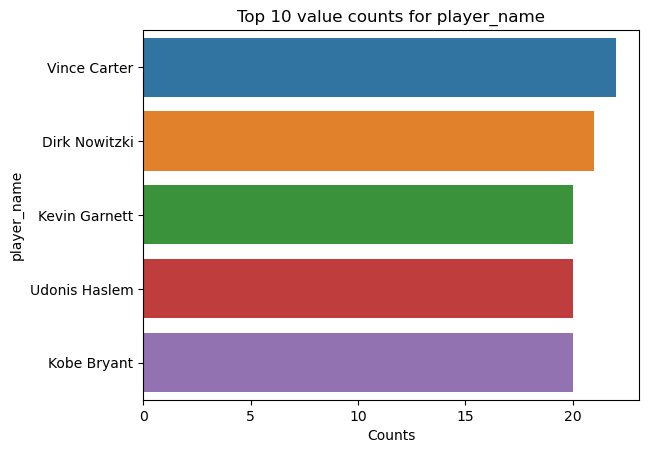

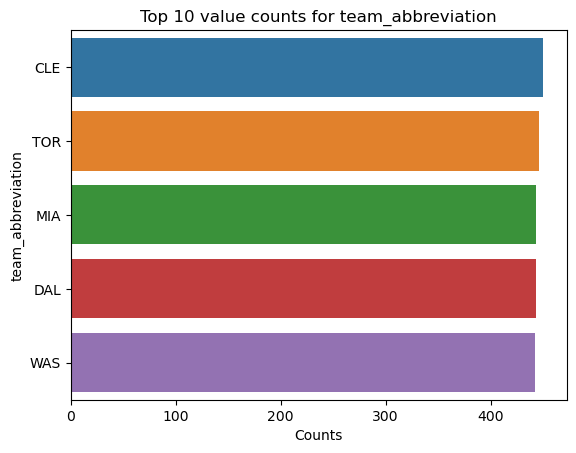

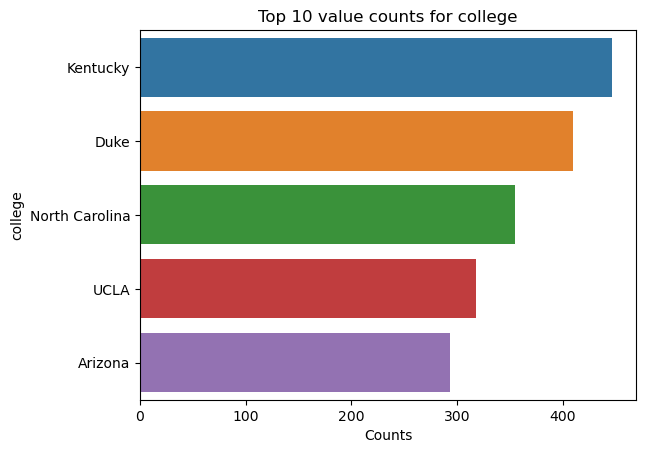

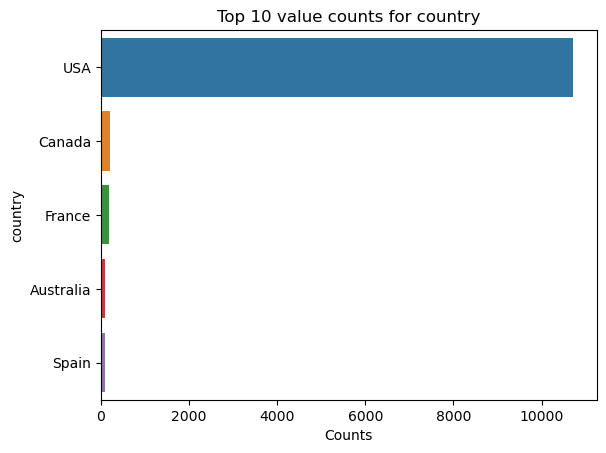

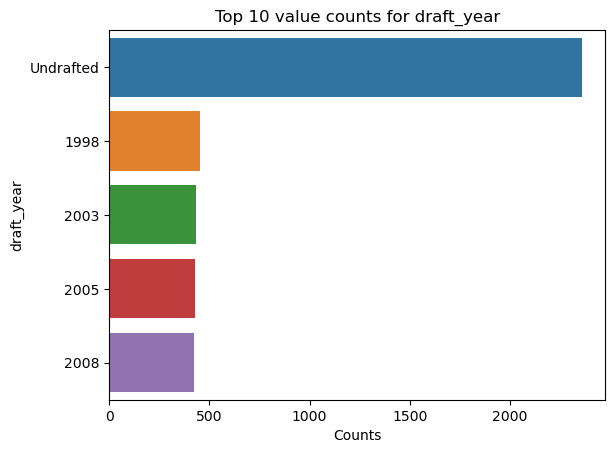

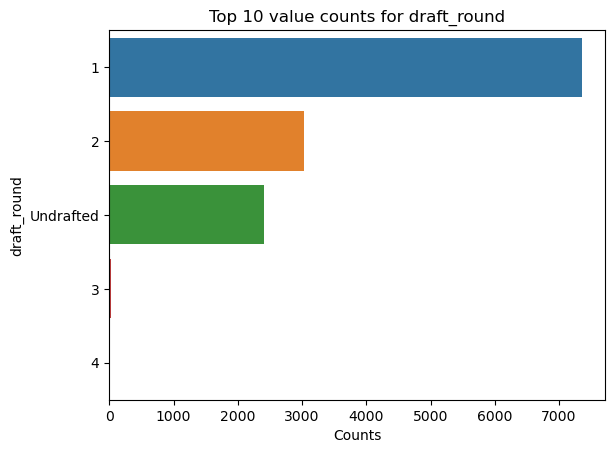

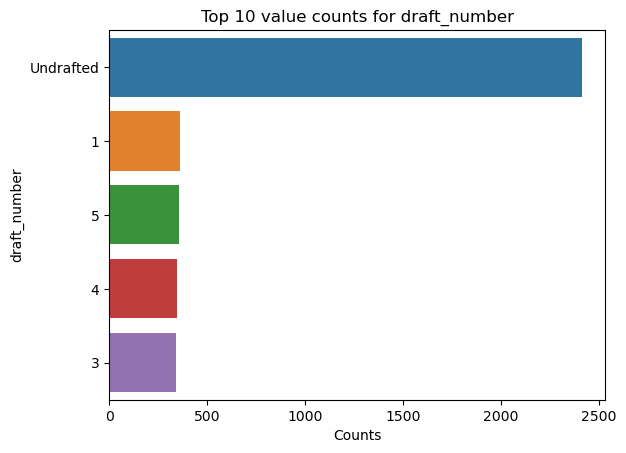

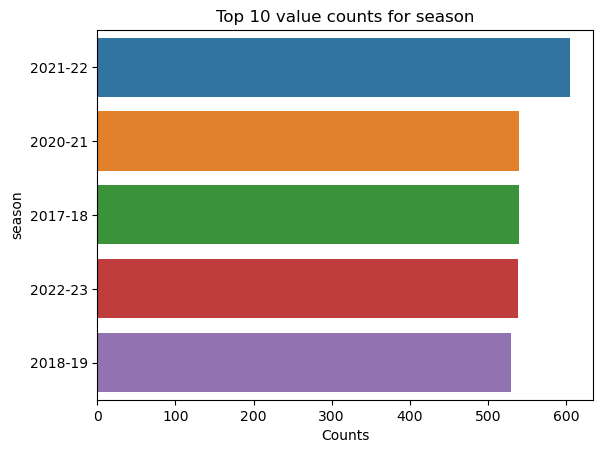

In [16]:
'''
Visualizing the count of the top 10 distinct values in all columns with datatype object
'''

for col in df.select_dtypes(include=['object']).columns:
    value_counts = df[col].value_counts().nlargest(5)  # Adjust based on your data
    sns.barplot(y=value_counts.index, x=value_counts.values, orient='h')
    plt.title(f'Top 10 value counts for {col}')
    plt.xlabel('Counts')
    plt.ylabel(col)

    plt.show()

In [18]:
# Converting the following columns into numeric data type:

df['draft_year'] = df['draft_year'].replace('Undrafted', np.nan)
df['draft_year'] = pd.to_numeric(df['draft_year'])

df['draft_round'] = df['draft_round'].replace('Undrafted', np.nan)
df['draft_round'] = pd.to_numeric(df['draft_round'])

df['draft_number'] = df['draft_number'].replace('Undrafted', np.nan)
df['draft_number'] = pd.to_numeric(df['draft_number'])

In [28]:
'''
# Helper function to automate data cleaning

The following helper function converts the non-numeric value 'Undrafted' to np.nan for
the columns draft_year, draft_round, and draft_number

'''
def clean_data(df):
  df['draft_year'] = df['draft_year'].replace('Undrafted', np.nan)
  df['draft_year'] = pd.to_numeric(df['draft_year'])

  df['draft_round'] = df['draft_round'].replace('Undrafted', np.nan)
  df['draft_round'] = pd.to_numeric(df['draft_round'])

  df['draft_number'] = df['draft_number'].replace('Undrafted', np.nan)
  df['draft_number'] = pd.to_numeric(df['draft_number'])
  df = df
  return df

In [19]:
# Double check that the columns got converted to a numeric datatype
df.dtypes

player_name           object
team_abbreviation     object
age                  float64
player_height_cm     float64
player_weight_lbs    float64
college               object
country               object
draft_year           float64
draft_round          float64
draft_number         float64
games_played           int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                object
dtype: object

In [ ]:
# If you get more time try and look into why the below conversion to period didn't work
# However, chatGPT's version in the next cell block did work.

'''
# Create copies of the 'season' column
df['season_categorical'] = df['season']
df['season_period'] = df['season']

# Convert to categorical
df['season_categorical'] = df['season_categorical'].astype('category')

# Convert to period
df['season_period'] = pd.PeriodIndex(df['season_period'], freq='Y')
df.season
'''

In [20]:
'''

df['season'] is an Object datatype which isn't very useful.
I will duplicate the column and create a categories datatype and a period datatype
Categorical and Period datatypes each have their own benefits for analysis which is why I am doing this.

chatGPT helped me make these conversions

'''

# Step 1: The original 'season' column remains unchanged.

# Step 2: Duplicate the 'season' column as categorical datatype
df['season_categorical'] = df['season'].astype('category')

# Step 3: Duplicate the 'season' column as period datatype
    # Convert the season to a period datatype, assuming the format is 'YYYY-YY' and using the starting year.
    # Note: Pandas Periods require a specific frequency, so we'll use 'A' (annual) frequency here,
    # assuming the season roughly corresponds to a single year.
df['season_period'] = df['season'].apply(lambda x: pd.Period(x.split('-')[0], 'A'))

# Display the data types of the new columns to verify
df.dtypes[['season', 'season_categorical', 'season_period']]


season                       object
season_categorical         category
season_period         period[A-DEC]
dtype: object

In [21]:
# For time's sake I am just going to fucus on analyzing the 2021-22 season
# saving the filtered Dataframe in variable df_2021-22

df_2021_22 = df[df['season'] == '2021-22']
df_2021_22.describe().T

,count,mean,std,min,25%,50%,75%,max
age,605.0,26.166942,4.153140,19.00,23.000,25.000,29.000,42.000
player_height_cm,605.0,198.350909,8.370804,175.26,193.040,198.120,203.200,228.600
player_weight_lbs,605.0,214.590083,24.385913,160.00,197.000,214.000,230.000,311.000
draft_year,438.0,2015.958904,4.344770,2001.00,2013.000,2017.000,2019.000,2021.000
draft_round,425.0,1.334118,0.482122,0.00,1.000,1.000,2.000,2.000
draft_number,424.0,23.617925,16.253467,0.00,9.000,21.000,36.000,60.000
games_played,605.0,43.039669,25.816438,1.00,17.000,48.000,66.000,82.000
pts,605.0,8.240000,6.333140,0.00,3.500,6.900,11.100,30.600
reb,605.0,3.446942,2.405157,0.00,1.800,3.000,4.500,14.700
ast,605.0,1.868264,1.833794,0.00,0.600,1.200,2.500,10.800


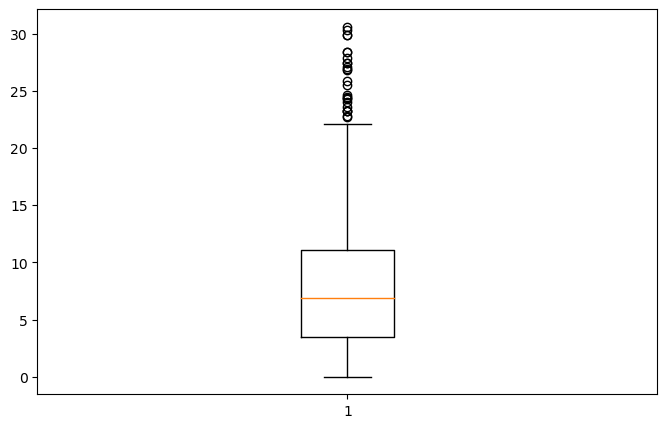

In [22]:
# Now that we are just working with the 2021-22 season, lets see some distribution of the data
# Action Items: 
    # Add axis labels and a title when you have time

plt.figure(figsize=(8, 5))
plt.boxplot(df_2021_22.pts)
plt.show()

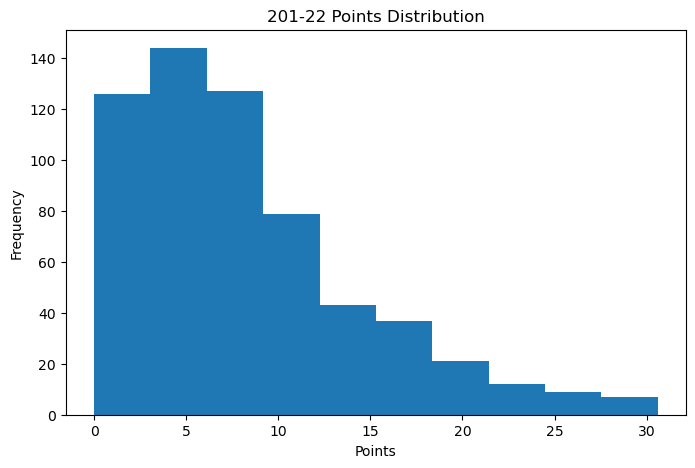

In [24]:
# Now lets do a histogram
plt.figure(figsize=(8,5))
plt.hist(df_2021_22.pts)
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.title('201-22 Points Distribution')
plt.show()

## Exploring Relationships Between Columns


### Player Height vs. Points Scored (Numerical to Numerical Analysis)

In [26]:
# Exploring Relationships Between Columns
'''
I am curious to see relationship between player height and
points scored using a scatter plot and calculating the Pearson correlation coefficient.

'''
# Player Height vs. Points Scored (Numerical to Numerical Analysis)

# Calculating Pearson correlation coefficient between 'player_height_cm' and 'pts'
correlation_height_pts = df_2021_22['player_height_cm'].corr(df_2021_22['pts'])
correlation_height_pts

0.022972543361708606

In [27]:
# The correlation coefficient suggests that there is no strong correlation between 
# player_heights and pts

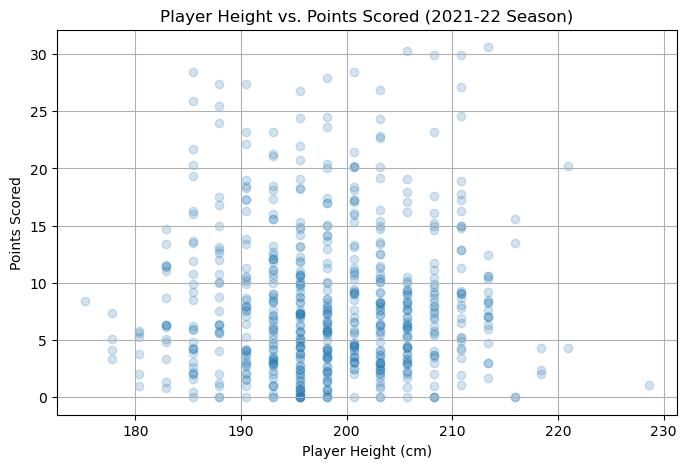

Correlation coefficient: 0.022972543361708606


In [45]:
# Now lets create a scatter plot to visualize the relationship between player height and points scored
plt.figure(figsize=(8, 5))
plt.scatter(df_2021_22['player_height_cm'], df_2021_22['pts'], alpha=0.2)
plt.title('Player Height vs. Points Scored (2021-22 Season)')
plt.xlabel('Player Height (cm)')
plt.ylabel('Points Scored')
plt.grid(True)
plt.show()

print("Correlation coefficient:", correlation_height_pts)

## Calculating average points scored by draft round


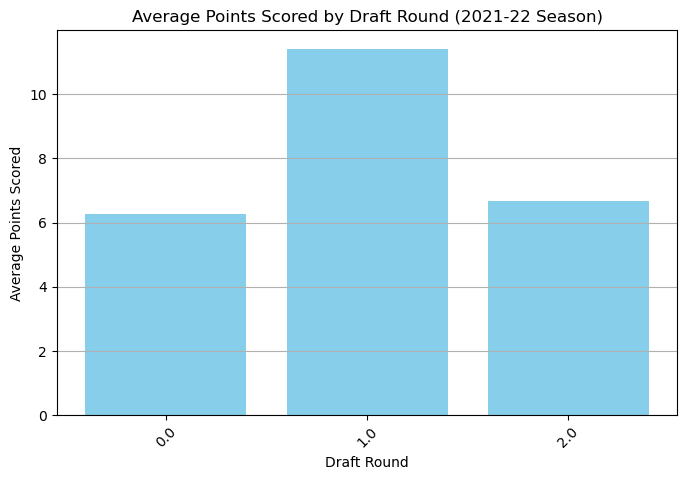

   draft_round        pts
0          0.0   6.250000
1          1.0  11.418996
2          2.0   6.672222


In [50]:
# I still need to research this code to understand how and what it does

# Calculating average points scored by draft round
avg_pts_by_draft_round = df_2021_22.groupby('draft_round')['pts'].mean().reset_index()

# Creating a bar chart to visualize the average points scored by draft round
plt.figure(figsize=(8, 5))
plt.bar(avg_pts_by_draft_round['draft_round'].astype(str), avg_pts_by_draft_round['pts'], color='skyblue')
plt.title('Average Points Scored by Draft Round (2021-22 Season)')
plt.xlabel('Draft Round')
plt.ylabel('Average Points Scored')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Display the average points scored by draft round
print(avg_pts_by_draft_round)